In [1]:
import pandas as pd
df=pd.read_csv(r'Pokemon.csv')
df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,318,45,49,49,65,65,45,1,False
1,405,60,62,63,80,80,60,2,False
2,525,80,82,83,100,100,80,3,False
3,309,39,52,43,60,50,65,1,False
4,405,58,64,58,80,65,80,2,False


In [2]:
df.shape

(151, 9)

In [3]:
df.isnull().sum()

Total        0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
Stage        0
Legendary    0
dtype: int64

In [4]:
df.dtypes

Total        int64
HP           int64
Attack       int64
Defense      int64
Sp. Atk      int64
Sp. Def      int64
Speed        int64
Stage        int64
Legendary     bool
dtype: object

In [5]:
df.corr()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224,0.328412
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207,0.172441
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321,0.147486
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861,0.141576
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712,0.334159
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308,0.215314
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042,0.199969
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000,-0.142508
Legendary,0.328412,0.172441,0.147486,0.141576,0.334159,0.215314,0.199969,-0.142508,1.000000


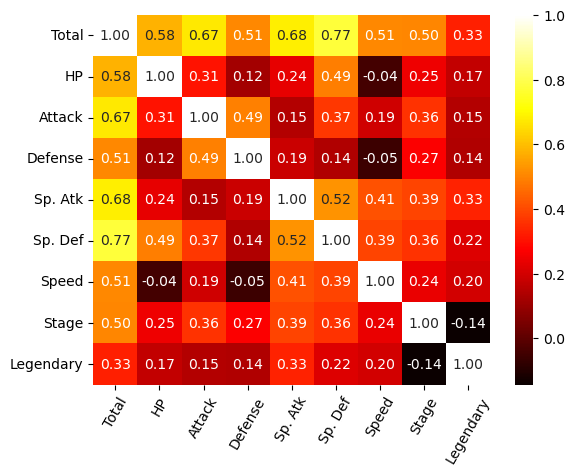

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='hot')
plt.xticks(rotation=60)
plt.show()

plot Box plot using seaborn

In [7]:
df1=df.select_dtypes(include=['int64','float64'])
df1

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,2
2,525,80,82,83,100,100,80,3
3,309,39,52,43,60,50,65,1
4,405,58,64,58,80,65,80,2
...,...,...,...,...,...,...,...,...
146,300,41,64,45,50,50,50,1
147,420,61,84,65,70,70,70,2
148,600,91,134,95,100,100,80,3
149,680,106,110,90,154,90,130,1


showfliers=False --> it removes outliers from all the columns 

<Axes: >

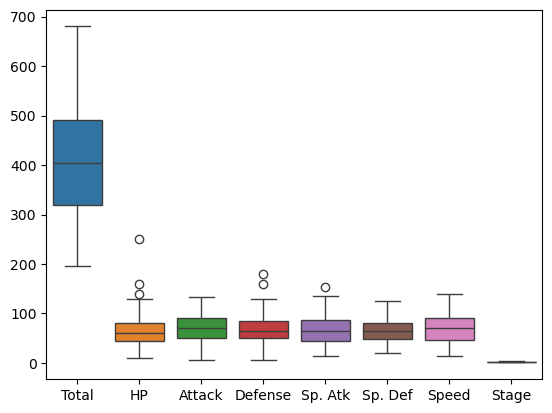

In [8]:
sns.boxplot(data=df1)#showfliers=False

In [14]:
def remove_outliers(df_number):
    
    Q1=df_number.quantile(0.25)
    Q3=df_number.quantile(0.75)
    
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    x=df_number[~((df_number<lower_bound) | (df_number>upper_bound))]
    return x

<Axes: >

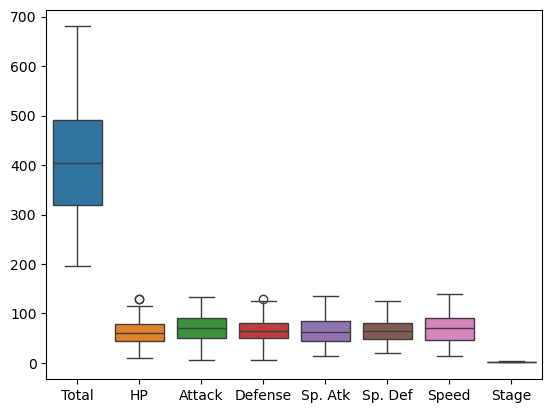

In [15]:
df_cleaned=remove_outliers(df1)
sns.boxplot(df_cleaned)

Violin Plot --> Alternatives to box plots. They show the distribution(through the thickness of the violin)

<Axes: >

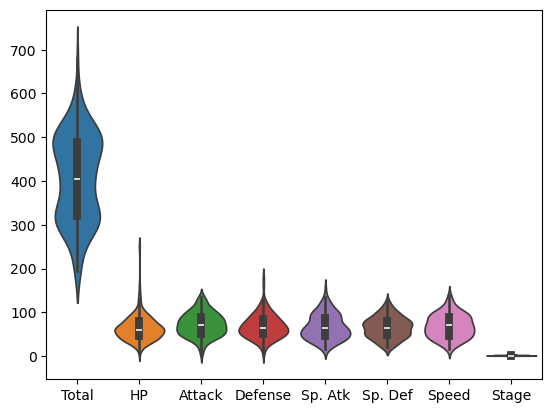

In [17]:
sns.violinplot(data=df1)

Scatter Plot

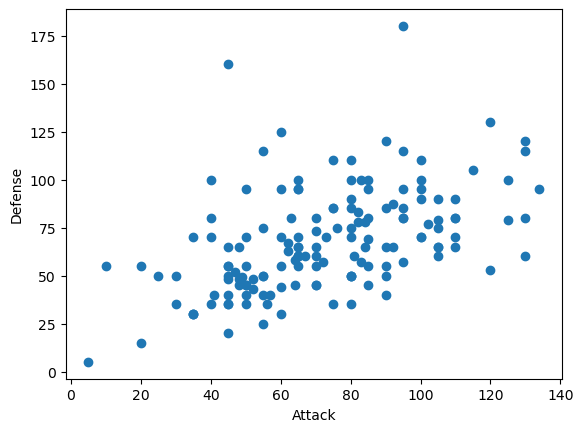

In [18]:
plt.scatter(df['Attack'], df['Defense'])
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

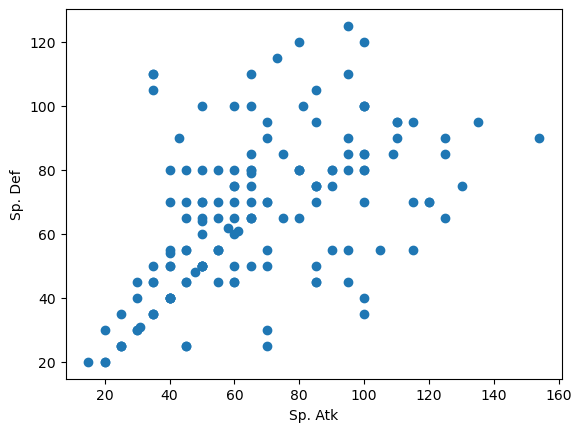

In [19]:
plt.scatter(df['Sp. Atk'], df['Sp. Def'])
plt.xlabel('Sp. Atk')
plt.ylabel('Sp. Def')
plt.show()

(array([ 2.,  5.,  9., 31., 24., 27., 25., 13.,  8.,  7.]),
 array([  5. ,  17.9,  30.8,  43.7,  56.6,  69.5,  82.4,  95.3, 108.2,
        121.1, 134. ]),
 <BarContainer object of 10 artists>)

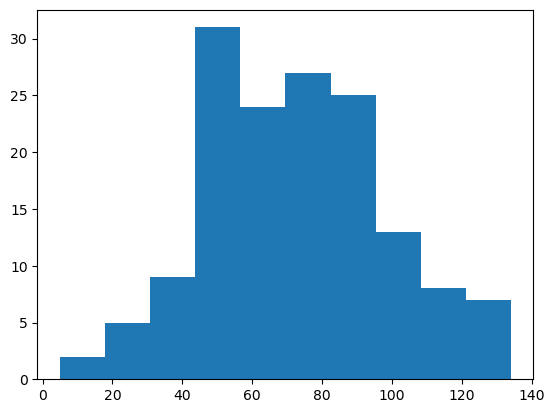

In [20]:
plt.hist(df['Attack'])

<Axes: xlabel='Attack', ylabel='Count'>

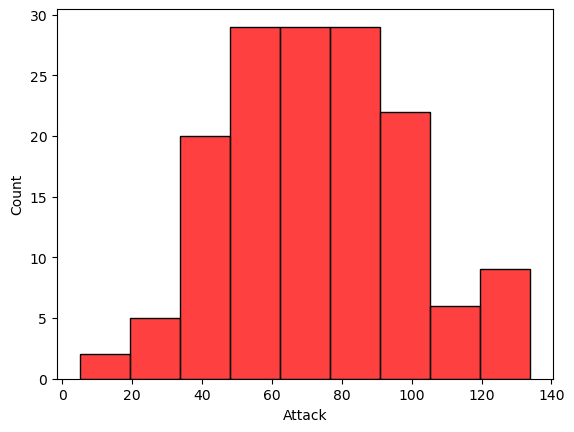

In [21]:
sns.histplot(df['Attack'], color='red')

Barplot --> It helps you visualize the distributions of categorical variables.
Using seaborn its countplot

In [22]:
df['Stage'].value_counts()

Stage
1    79
2    56
3    16
Name: count, dtype: int64

<Axes: xlabel='Stage', ylabel='count'>

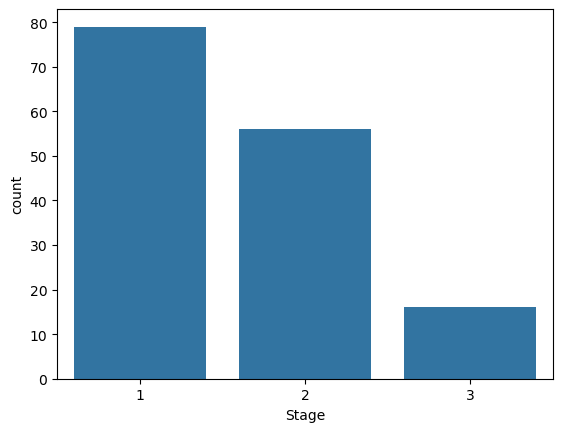

In [23]:
sns.countplot(x='Stage', data=df)

Jointplot --> It gives both Histogram and scatter plot

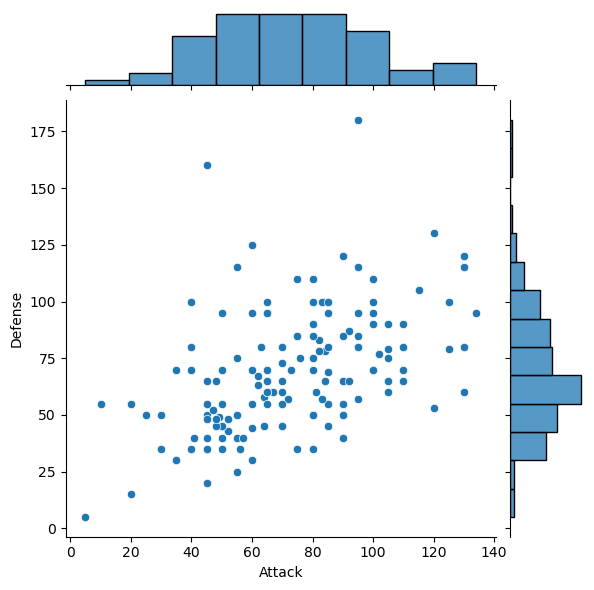

In [24]:
sns.jointplot(x='Attack',y='Defense',data=df)